# Feature significance of two models on Statlog (German Credit Dataset)

In [155]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier

import gensim
from gensim import corpora

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [158]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [159]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [160]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from math import sqrt
from scipy.stats import mannwhitneyu

In [162]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
from gensim.models import FastText
import numpy as np
np.random.seed(42)

In [163]:
pd.set_option('display.max_columns', None)

### Retrieving the data

#### DF 5

In [164]:
df5 = pd.read_csv('df5.csv')

In [165]:
df5.head(2)

,Unnamed: 0,account_balance,duration,credit_history,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,property,age,other_installment_plans,type_of_housing,nr_of_existing_credits,job,number_of_dependents,telephone,foreign,target
0,0,0,0,4,4,1,4,4,3,2,0,3,0,9,2,1,1,2,0,1,0,1
1,1,1,7,2,4,8,0,2,1,1,0,1,0,0,2,1,0,2,0,0,0,2


#### DF 5c

In [166]:
df5c = pd.read_csv('df5c.csv')

In [167]:
df5c.head(2)

,Unnamed: 0,account_balance,duration,credit_history,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,property,age,other_installment_plans,type_of_housing,nr_of_existing_credits,job,number_of_dependents,telephone,foreign,target
0,0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0,1
1,1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0,2


#### DF7

In [168]:
#df7 = pd.read_csv('df7.csv')
df7 = pd.read_csv('df7.csv', index_col=0)

In [169]:
df7.head(2)

,account_balance,duration,credit_history,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,property,age,other_installment_plans,type_of_housing,nr_of_existing_credits,job,number_of_dependents,telephone,foreign,target,content
0,A11,A20,A34,A43,A51,A65,A75,A84,A93,A101,A114,A121,A139,A143,A152,A162,A173,A181,A192,A201,__label__1,__label__1 A11 A20 A34 A43 A51 A65 A75 A84 A93...
1,A12,A27,A32,A43,A58,A61,A73,A82,A92,A101,A112,A121,A130,A143,A152,A161,A173,A181,A191,A201,__label__2,__label__2 A12 A27 A32 A43 A58 A61 A73 A82 A92...


# Models

In [170]:
# Initialize lists to store evaluation metrics for each fold
dataset_used = []
model_used = []
data_balancing_technique = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

In [171]:
#combined_metrics = pd.DataFrame()

combined_metrics = pd.DataFrame(columns=['dataset', 'model', 'data balancing technique', 'fold', 'precision_1','precision_2','recall_1','recall_2','f1-score_1','f1-score_2','support_1','support_2','TP','FP','TN','FN'])

# Linear Regression

In [172]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [173]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Initialize Linear Regression model
linr = LinearRegression()
# Train the model
linr.fit(X_train, y_train)

LinearRegression()

In [175]:
# Predict and evaluate the model
y_pred = linr.predict(X_test)

y_pred = np.round(y_pred)
    
y_pred[y_pred <= 0] = 1
y_pred[y_pred >= 2] = 2

accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [176]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [177]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [178]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [179]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          4786.0  0.000028     0.394522    0.204594
savings_bond_value       4249.5  0.004671     0.238199    0.123527
other_installment_plans  3972.0  0.024924     0.157343    0.081596
job                      3854.5  0.147751     0.123106    0.063841
credit_history           3847.5  0.173159     0.121066    0.062783
nr_of_existing_credits   3841.5  0.147669     0.119318    0.061877
duration                 3039.0  0.242971    -0.114510    0.059383
residence_since          3814.5  0.234738     0.111451    0.057797
credit_amount            3728.5  0.382683     0.086393    0.044802
telephone                3728.0  0.288170     0.086247    0.044727
purpose                  3710.5  0.402022     0.081148    0.042082
intallment_rate          3203.5  0.471459    -0.066579    0.034527
guarantor                3226.5  0.157041    -0.059878    0.031052
age               

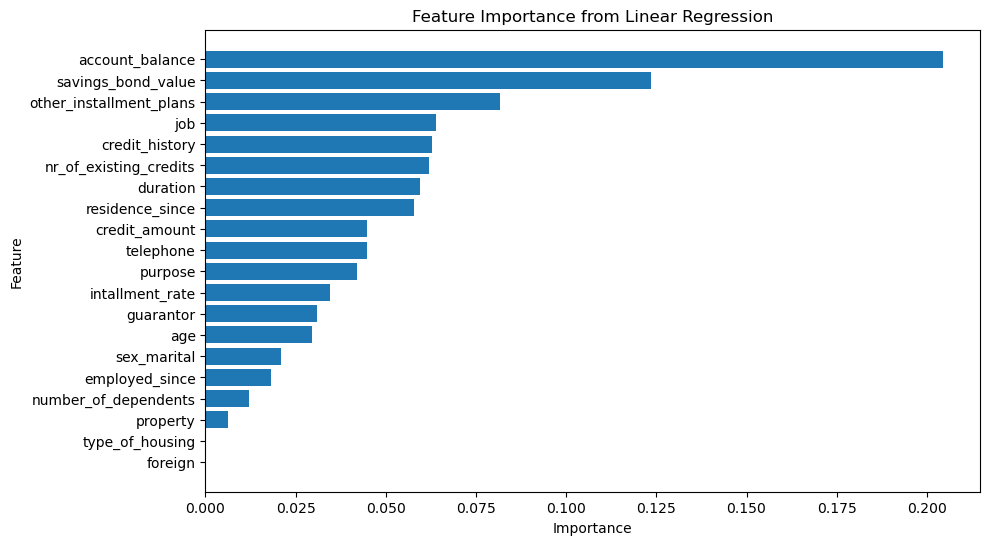

In [180]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [181]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Linear Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [182]:
results_df.head(20)

,feature,u_stat,p_value,effect_size,proportion,rank,model
0,account_balance,4786.0,0.000028,0.394522,0.204594,1,Linear Regression
1,savings_bond_value,4249.5,0.004671,0.238199,0.123527,2,Linear Regression
2,other_installment_plans,3972.0,0.024924,0.157343,0.081596,3,Linear Regression
3,job,3854.5,0.147751,0.123106,0.063841,4,Linear Regression
4,credit_history,3847.5,0.173159,0.121066,0.062783,5,Linear Regression
5,nr_of_existing_credits,3841.5,0.147669,0.119318,0.061877,6,Linear Regression
6,duration,3039.0,0.242971,-0.114510,0.059383,7,Linear Regression
7,residence_since,3814.5,0.234738,0.111451,0.057797,8,Linear Regression
8,credit_amount,3728.5,0.382683,0.086393,0.044802,9,Linear Regression
9,telephone,3728.0,0.288170,0.086247,0.044727,10,Linear Regression


In [183]:
all_results_df = results_df.copy()

In [184]:
all_results_df.head(2)

,feature,u_stat,p_value,effect_size,proportion,rank,model
0,account_balance,4786.0,0.000028,0.394522,0.204594,1,Linear Regression
1,savings_bond_value,4249.5,0.004671,0.238199,0.123527,2,Linear Regression


In [185]:
'''
# Pivot the DataFrame so that 'model' values become columns and the 'feature' values are listed under each column
transformed_df = results_df.pivot(columns='model', values='feature')

# Reset the index to have a simple enumeration and bring 'Rank' as a column
transformed_df = transformed_df.reset_index()

# Display the transformed DataFrame
print(transformed_df.head(2))

'''

"\n# Pivot the DataFrame so that 'model' values become columns and the 'feature' values are listed under each column\ntransformed_df = results_df.pivot(columns='model', values='feature')\n\n# Reset the index to have a simple enumeration and bring 'Rank' as a column\ntransformed_df = transformed_df.reset_index()\n\n# Display the transformed DataFrame\nprint(transformed_df.head(2))\n\n"

In [186]:
#top_features_df = transformed_df.copy()

# Decision Tree Classifier

In [199]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [200]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# Initialize Linear Regression model
dtc = DecisionTreeClassifier()
# Train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [202]:
# Predict and evaluate the model
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [203]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [204]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [205]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [206]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          5040.5  0.001512     0.278666    0.143379
credit_history           4706.0  0.019374     0.193810    0.099719
savings_bond_value       4681.5  0.016961     0.187595    0.096522
nr_of_existing_credits   4543.0  0.047319     0.152461    0.078444
credit_amount            4479.0  0.139850     0.136225    0.070091
intallment_rate          3406.0  0.114541    -0.135972    0.069960
job                      4439.5  0.111681     0.126205    0.064935
age                      3518.0  0.243505    -0.107560    0.055342
other_installment_plans  4335.0  0.127925     0.099696    0.051295
type_of_housing          4306.5  0.213537     0.092466    0.047576
duration                 3671.5  0.453598    -0.068620    0.035306
guarantor                3704.5  0.126887    -0.060249    0.030999
telephone                4178.0  0.429628     0.059868    0.030803
sex_marital       

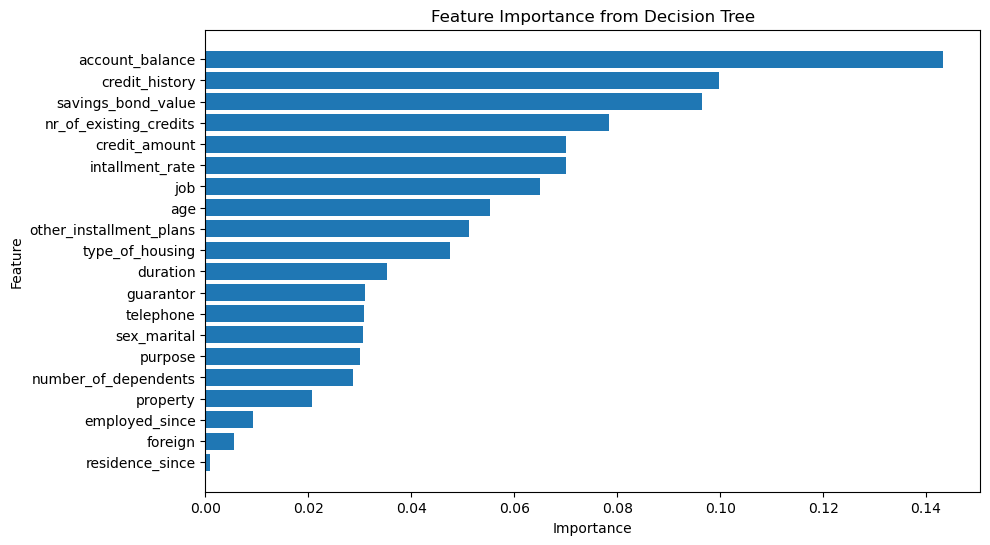

In [207]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [208]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Decision Tree Classifier'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [209]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# Word2Vec - Linear Regression

In [288]:
#df7 = pd.read_csv('df7.csv')
#df7 = pd.read_csv('df7.csv', index_col=0)

# Assuming 'df7' is your DataFrame with features and the target column
X = df7['content'].apply(lambda x: x.split(' ', 1)[1])  # Drop the target column to get the feature columns
y = df7['target'].apply(lambda x: int(x.split("__label__")[1]))  # Target column to predict

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(preprocess)

In [289]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
sentences = [sentence.split() for sentence in X_train]

In [291]:
# Train the Word2Vec model
Word2Vec_model = Word2Vec(sentences, vector_size=100, window=10, min_count=2, workers=4, seed=42)

In [292]:
def vectorize(sentence):
        words = sentence.split()
        words_vecs = [Word2Vec_model.wv[word] for word in words if word in Word2Vec_model.wv]
        if len(words_vecs) == 0:
            return np.zeros(100)
        words_vecs = np.array(words_vecs)
        return words_vecs.mean(axis=0)

In [293]:
X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [294]:
#clf = LogisticRegression()
clf = LinearRegression()
clf.fit(X_train, y_train)
    
y_pred = clf.predict(X_test)
    
y_pred = np.round(y_pred)
    
y_pred[y_pred <= 0] = 1
y_pred[y_pred >= 2] = 2

In [295]:
## Now that we have the predictions from the Word Embedding method we retrieve the other dataset
## this is the dataset that will be used for the feature importance
## based on the target value and the predicted value

# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

Accuracy: 0.73


In [297]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)
    

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [298]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat       p_value  effect_size  proportion
account_balance          5722.0  1.113727e-07     0.468874    0.200022
savings_bond_value       5107.5  8.237567e-05     0.311128    0.132727
duration                 2915.5  6.239080e-03    -0.251572    0.107321
intallment_rate          3060.0  1.330976e-02    -0.214478    0.091496
other_installment_plans  4564.5  9.100791e-03     0.171737    0.073263
age                      3239.5  6.938344e-02    -0.168399    0.071839
nr_of_existing_credits   4234.0  2.614166e-01     0.086895    0.037069
credit_history           4205.0  3.411175e-01     0.079451    0.033894
residence_since          4204.0  3.685150e-01     0.079194    0.033784
telephone                4197.5  3.090589e-01     0.077525    0.033072
purpose                  3595.0  3.959758e-01    -0.077140    0.032908
property                 3624.0  4.352929e-01    -0.069696    0.029732
job                      4090.5  

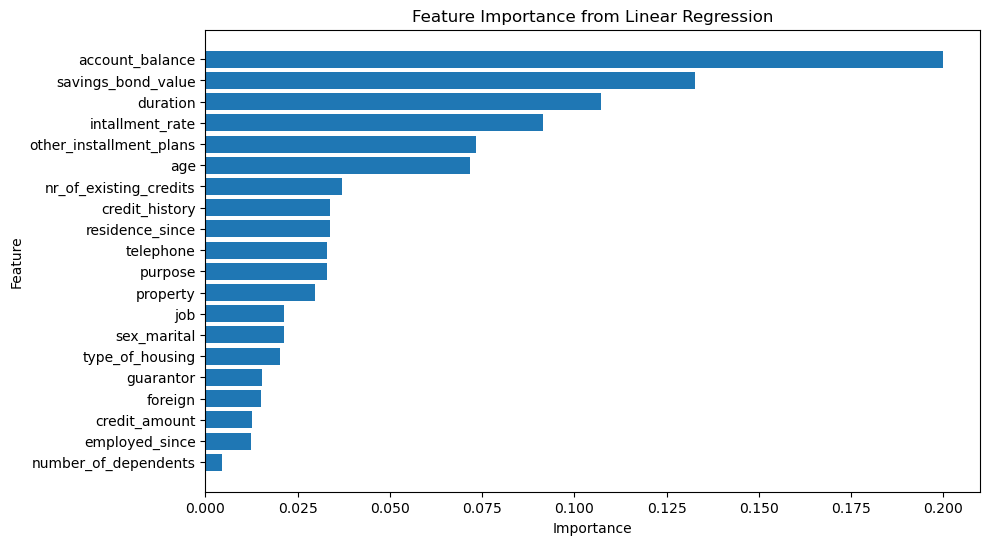

In [299]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [300]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Word2Vec - Linear Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [301]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

In [302]:
all_results_df

,feature,u_stat,p_value,effect_size,proportion,rank,model
0,account_balance,4786.0,0.000028,0.394522,0.204594,1,Linear Regression
1,savings_bond_value,4249.5,0.004671,0.238199,0.123527,2,Linear Regression
2,other_installment_plans,3972.0,0.024924,0.157343,0.081596,3,Linear Regression
3,job,3854.5,0.147751,0.123106,0.063841,4,Linear Regression
4,credit_history,3847.5,0.173159,0.121066,0.062783,5,Linear Regression
...,...,...,...,...,...,...,...
215,guarantor,3755.0,0.364358,-0.036067,0.015386,16,Word2Vec - Linear Regression
216,foreign,4034.0,0.287374,0.035554,0.015167,17,Word2Vec - Linear Regression
217,credit_amount,3779.0,0.748127,-0.029906,0.012758,18,Word2Vec - Linear Regression
218,employed_since,3783.5,0.748995,-0.028751,0.012265,19,Word2Vec - Linear Regression


In [303]:
results_df1 = all_results_df.copy()

In [304]:
# Set the index to 'rank'
results_df1.set_index('rank', inplace=True)

# Pivot the DataFrame so that 'model' values become columns and the 'feature' values are listed under each column
transformed_df = results_df1.pivot(columns='model', values='feature')

# Reset the index to have a simple enumeration and bring 'rank' as a column
#transformed_df = transformed_df.reset_index()

# Display the transformed DataFrame
print(transformed_df)

model   Bagged Tree Classifier Decision Tree Classifier  \
rank                                                      
1              account_balance          account_balance   
2           savings_bond_value           credit_history   
3               credit_history       savings_bond_value   
4              residence_since   nr_of_existing_credits   
5       nr_of_existing_credits            credit_amount   
6                    telephone          intallment_rate   
7                          job                      job   
8              type_of_housing                      age   
9                     duration  other_installment_plans   
10               credit_amount          type_of_housing   
11                    property                 duration   
12              employed_since                guarantor   
13             intallment_rate                telephone   
14                     purpose              sex_marital   
15        number_of_dependents                  purpose 

In [305]:
transformed_df[['Word2Vec - Linear Regression','FastText - train_supervised','FastText - Linear Regression']].head(5)

model,Word2Vec - Linear Regression,FastText - train_supervised,FastText - Linear Regression
rank,,,
1,account_balance,account_balance,account_balance
2,savings_bond_value,intallment_rate,other_installment_plans
3,duration,credit_amount,intallment_rate
4,intallment_rate,savings_bond_value,duration
5,other_installment_plans,telephone,savings_bond_value


In [306]:
transformed_df.loc[:, ~transformed_df.columns.isin(['Word2Vec - Linear Regression','FastText - train_supervised','FastText - Linear Regression'])].head(5)

model,Bagged Tree Classifier,Decision Tree Classifier,LightGBM,Linear Regression,Logistic Regression,Random Forest Classifier,SVC,XGBoost
rank,,,,,,,,
1,account_balance,account_balance,account_balance,account_balance,account_balance,account_balance,account_balance,account_balance
2,savings_bond_value,credit_history,credit_history,savings_bond_value,savings_bond_value,savings_bond_value,savings_bond_value,savings_bond_value
3,credit_history,savings_bond_value,residence_since,other_installment_plans,other_installment_plans,telephone,duration,telephone
4,residence_since,nr_of_existing_credits,job,job,age,credit_history,intallment_rate,intallment_rate
5,nr_of_existing_credits,credit_amount,sex_marital,credit_history,credit_history,type_of_housing,telephone,duration


In [307]:
# Group by 'feature' and calculate the mean of all other columns
average_df = all_results_df.drop(columns=['model']).groupby('feature').mean()

# Sort the resulting DataFrame by the 'rank' column in ascending order
average_df = average_df.sort_values(by='rank', ascending=True)

# Reset index to have 'feature' as a column
average_df = average_df.reset_index()

In [308]:
# Display the result
average_df.head(5)

,feature,u_stat,p_value,effect_size,proportion,rank
0,account_balance,4992.500000,0.000758,0.368131,0.186099,1.000000
1,savings_bond_value,4426.090909,0.031834,0.213706,0.106683,3.090909
2,credit_history,4139.772727,0.146913,0.138907,0.070719,5.090909
3,nr_of_existing_credits,4029.318182,0.211201,0.107898,0.054955,7.545455
4,intallment_rate,3173.227273,0.285469,-0.124146,0.061799,8.090909
